# Visão Humana e Cores

Prof. Dr. Gustavo Resque  
MSc. Tiago Araújo

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as pnumpylt
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import *
from matplotlib.colors import *
import cv2

### Luz

* São partículas: fótons  
* Agem como ondas
* Duas propriedades fundamentais:
  * Amplitude
  * Comprimento de onda

\begin{equation*}
\lambda = c\, / \, f
\end{equation*}

\begin{equation*}
\mathbf{\lambda} \,: \,comprimento\, de\, onda \\
c \,: \,velocidade \,da \,luz \\
f \,: \,frequência
\end{equation*}

In [2]:
def plot_luz():
    fig_luz, ax = plt.subplots(1,1,figsize=(7,3), dpi = 100)

    def update_luz(f=5, s=100, p=1):
        ax.clear()
        x = np.arange(s)
        y = np.sin(p + 2 * np.pi * f * x/s)
        ax.plot(x,y)

    def plotluz(frequency,samples, phase):
        update_luz(f=frequency,s=samples, p=phase)

    interact(plotluz, frequency=(0,10,1), samples=(10,110,10),phase=(0,10,1));

<IPython.core.display.Javascript object>


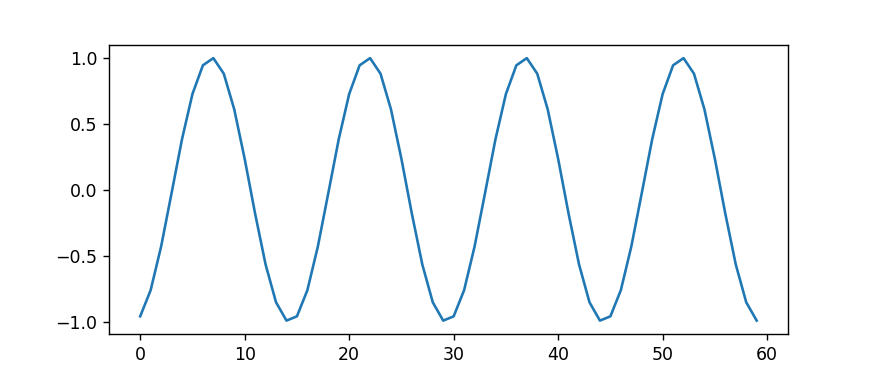

interactive(children=(IntSlider(value=5, description='frequency', max=10), IntSlider(value=60, description='sa…

In [3]:
plot_luz()

### Sistema Visual Humano

* Sistema biológico altamente complexo
* O olho é o principal orgão da visão, e contém tém vários componentes (ex. Córnea, Retina, Pupila)
* Na retina os cones e os bastonetes são sensores de cor e iluminação
  

### Cores

* As respostas individuais de todos os cones em uma região são combinadas para perceber uma certa cor no campo de visão
* Um modelo de cor é um modelo matemático abstrato para representar cores
* Um modelo de cor pode ser aditivo ou subtrativo

In [4]:

hsv_canvas = np.zeros((200,200,3), dtype=np.float32)
rgb_canvas = np.zeros((200,200,3), dtype=np.uint8)

slider_hue = FloatSlider(min=0,max=1,step=.1,value=.5,description='Hue')
slider_sat = FloatSlider(min=0,max=1,step=.1,value=.5,description='Saturation')
slider_val = FloatSlider(min=0,max=1,step=.1,value=.5,description='Value')

slider_red = IntSlider(min=0,max=255,step=10,value=125,description='Red')
slider_green = IntSlider(min=0,max=255,step=10,value=125,description='Green')
slider_blue = IntSlider(min=0,max=255,step=10,value=125,description='Blue')

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='flex-end',
                    width='100%',
                    overflow_x='unset')

group_hsv = [slider_hue,slider_sat,slider_val]
group_rgb = [slider_red, slider_green, slider_blue]

box_hsv = Box(children=group_hsv, layout=box_layout)
box_rgb = Box(children=group_rgb, layout=box_layout)

def update_colors_hsv(h,s,v):
    hsv_canvas[:,:,:] = h,s,v
    
def update_colors_rgb(r,g,b):
    rgb_canvas[:,:,:] = r,g,b

vb_hsv=VBox([box_hsv])
vb_rgb=VBox([box_rgb])

update_colors_hsv(.5,.5,.5)
update_colors_rgb(120,120,120)

In [5]:
def colors_plots_interact():
    fig, axes = plt.subplots(figsize=(7,3), dpi = 100, nrows=1, ncols=2)
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    axes[0].imshow(hsv_to_rgb(hsv_canvas)) # equivalente a cv2.cvtColor HSV2BGR
    axes[1].imshow(rgb_canvas)
    plt.tight_layout()
    def plotcolors_hsv(args):
        update_colors_hsv(h=slider_hue.value,s=slider_sat.value, v=slider_val.value)
        axes[0].imshow(hsv_to_rgb(hsv_canvas))

    def plotcolors_rgb(args):
        update_colors_rgb(r=slider_red.value,g=slider_green.value,b=slider_blue.value)
        axes[1].imshow(rgb_canvas)

    for s in group_hsv:
        s.observe(plotcolors_hsv, names='value')

    for s in group_rgb:
        s.observe(plotcolors_rgb, names='value')

    display(HBox([vb_hsv, vb_rgb]))


<IPython.core.display.Javascript object>


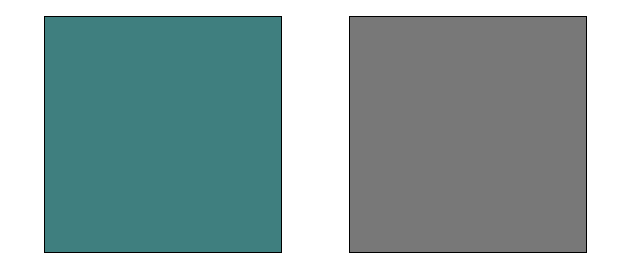

SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oQm94KGNoaWxkcmVuPShGbG9hdFNsaWRlcih2YWx1ZT0wLjUsIGRlc2NyaXB0aW9uPXUnSHVlJywgbWF4PTEuMCksIEZsb2F0U2xpZGVyKHbigKY=


In [6]:
colors_plots_interact()

In [7]:
slider_hue_link = FloatSlider(min=0,max=1,step=.1,value=.5,description='Hue')
slider_sat_link = FloatSlider(min=0,max=1,step=.1,value=.5,description='Saturation')
slider_val_link = FloatSlider(min=0,max=1,step=.1,value=.5,description='Value')

slider_red_link = IntSlider(min=0,max=255,step=10,value=125,description='Red')
slider_green_link = IntSlider(min=0,max=255,step=10,value=125,description='Green')
slider_blue_link = IntSlider(min=0,max=255,step=10,value=125,description='Blue')

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='flex-end',
                    width='100%',
                    overflow_x='unset')

group_hsv_link = [slider_hue_link,slider_sat_link,slider_val_link]
group_rgb_link = [slider_red_link, slider_green_link, slider_blue_link]

box_hsv_link = Box(children=group_hsv_link, layout=box_layout)
box_rgb_link = Box(children=group_rgb_link, layout=box_layout)

vb_hsv_link=VBox([box_hsv_link])
vb_rgb_link=VBox([box_rgb_link])

def colors_link_interact():
    fig, ax = plt.subplots(figsize=(7,3), dpi = 100, nrows=1, ncols=1)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
     
    linked_canvas_hsv = np.zeros((200,200,3), dtype=np.float32)
    
    def plotcolors_hsv(args):    
        linked_canvas_hsv[:,:,:] = slider_hue_link.value,slider_sat_link.value, slider_val_link.value
        ax.imshow(hsv_to_rgb(linked_canvas_hsv))
        r,g,b = hsv_to_rgb(linked_canvas_hsv)[100,100] * 255
    
        for s in group_rgb_link:
            s.unobserve(plotcolors_rgb, names='value')
        slider_red_link.value = r.astype(np.uint8)
        slider_green_link.value = g.astype(np.uint8)
        slider_blue_link.value = b.astype(np.uint8)
        for s in group_rgb_link:
            s.observe(plotcolors_rgb, names='value')

    def plotcolors_rgb(args):    
        linked_canvas_hsv[:,:,:] = slider_red_link.value,slider_green_link.value, slider_blue_link.value
        ax.imshow((linked_canvas_hsv*255).astype(np.uint8))
        h,s,v = rgb_to_hsv(linked_canvas_hsv)[100,100]
        
        for slider in group_hsv_link:
            slider.unobserve(plotcolors_hsv, names='value')
        slider_hue_link.value = h
        slider_sat_link.value = s
        slider_val_link.value = v/255
        for s in group_hsv_link:
            s.observe(plotcolors_hsv, names='value')
        
    for s in group_hsv_link:
        s.observe(plotcolors_hsv, names='value')

    for s in group_rgb_link:
        s.observe(plotcolors_rgb, names='value')
        
    display(HBox([vb_hsv_link, vb_rgb_link]))
    plotcolors_hsv(None)
    ax.imshow(linked_canvas_hsv)


<IPython.core.display.Javascript object>


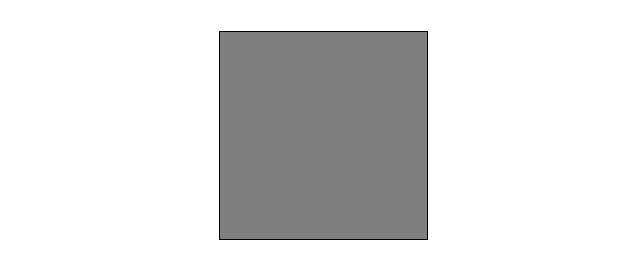

SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oQm94KGNoaWxkcmVuPShGbG9hdFNsaWRlcih2YWx1ZT0wLjUsIGRlc2NyaXB0aW9uPXUnSHVlJywgbWF4PTEuMCksIEZsb2F0U2xpZGVyKHbigKY=


In [8]:
colors_link_interact()

### Imagem Digital

* Uma imagem digital é uma representação númerica de uma imagem
* Possui duas dimensões espaciais e uma ou mais dimensões de cor
* Tem representação matricial

\begin{equation*}
I(x,y)\,c\,\,|\,\,I[x,y,c]\\
I\,=\,imagem\,digital \\
x,y\,=\,coordenadas\,de\,linha\,e\,coluna \\
c\,=\,canal\,de\,cor
\end{equation*}

#### Imagem Binária - 2 valores

In [9]:
random_imagem_pb = np.random.randint(0,size=(15,15),high=2)
print random_imagem_pb

[[0 1 0 1 1 1 0 1 0 1 1 1 0 1 0]
 [1 0 0 0 0 1 1 0 0 0 0 0 0 1 1]
 [0 0 1 0 1 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 1 0 0 1 1 1 1 0 0 1 0 1]
 [0 0 0 0 0 1 1 1 1 0 1 1 0 0 0]
 [1 1 0 1 1 1 1 0 1 0 1 1 0 1 1]
 [0 1 0 0 1 0 0 1 0 0 1 1 0 0 0]
 [1 1 0 0 1 0 0 1 0 0 0 1 1 1 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 1 1 1]
 [0 0 1 1 0 0 1 1 0 0 1 0 1 0 0]
 [1 0 0 1 0 0 1 1 1 1 0 1 1 0 1]
 [0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]
 [0 1 0 1 1 0 1 1 1 0 1 1 1 0 0]
 [1 1 0 1 0 1 0 1 1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0 1 1 1 0 1 1 1 0]]


#### Imagem Escala de Cinza - 256 valores 

In [10]:
random_imagem_cinza = np.random.randint(0,size=(15,15),high=256)
print random_imagem_cinza.view(type=np.matrix)

[[ 43 218  55  73  87 173 223 193  97  98 207 194 191   8  29]
 [101  95  80 155  23 112 165 240  92 135  58 133  78 182  54]
 [153  62 194 198  12  74 218 171  12 156 131 141 205 160  12]
 [ 40  97  51  29 205 185  27 204  51  32 192  88 209   7 134]
 [ 93 233 145  74 163 120  64 216 243 122 164 232  41 157 146]
 [ 19  15 167  40 178 122 253  89 147 126  33 254  97 128 194]
 [180  35 145  22  60 144 137  20  71   3 223 254 163 124 124]
 [ 54 164 243  46  79 148  25 135 237 218 110  27 190 197 122]
 [194 240 135 126 131   8 113  19 168  10  40 180 241 176 198]
 [ 99  80 186  84 195  73 107 155 149  39  18  89 102  11  64]
 [123 254  37 250 235 109  90  30 158 116  77 177 101 137 142]
 [ 75 220  64 249  42  80 171 147 208  89  33 172 189 222 209]
 [ 51 248  12  89 196  43 101 126 213  81 174 185   2 180  68]
 [146 114 201  13 132 111  28  20 158  28 116 191 142 211  46]
 [ 47  97 117 248 161  29 208 230 241  45  35 158 220 127 121]]


#### Imagem Colorida - 2^24 valores

In [11]:
random_imagem_color = np.random.randint(0,size=(3,3,3),high=256)
print random_imagem_color

[[[145 158  25]
  [ 25 180 215]
  [231 117 136]]

 [[ 36  76 248]
  [101 236 116]
  [138  39 108]]

 [[173 154 221]
  [ 35  13 226]
  [ 38 225 126]]]


In [12]:
def mostrar_imagens(path):
    fig, axes = plt.subplots(figsize=(7,3), dpi = 100, nrows=1, ncols=3)
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    
    colorida = cv2.imread(path,1) # 1 colorida
    cinza = cv2.imread(path,0) # 0 escala de cinza
    newimg = cv2.cvtColor(colorida, cv2.COLOR_BGR2HSV)
    newimg[:,:,0] = newimg[:,:,0]
    
    #cv2.cvtColor(colorida, cv2.COLOR_BGR2RGB)
    
    thresh, pb = cv2.threshold(cinza, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    axes[2].imshow(cv2.cvtColor(colorida, cv2.COLOR_BGR2RGB))
    axes[1].imshow(cinza,cmap='gray')
    axes[0].imshow(pb,cmap='gray')

<IPython.core.display.Javascript object>


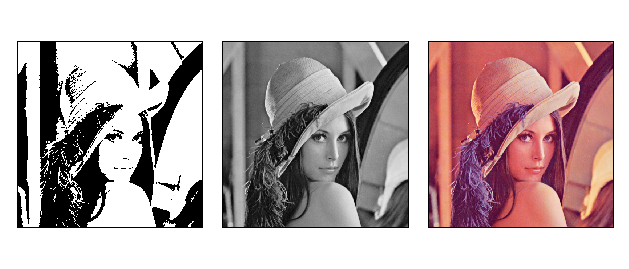

In [13]:
mostrar_imagens('dataset/lenna.png')

### Profundidade de Cor

* Descreve a capacidade da imagem de representar cores.
* É número de bits necessário para representar cores em um pixel.
* Bits per pixel (bpp)

In [14]:
def imagemprofundidade(caminho):
    fig, axes = plt.subplots(1,1,figsize=(8,2), dpi = 100)
    img = cv2.imread(caminho,1)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
#     def spacedarray(interval, end):
#         step = interval
#         i = 0
#         cont = 0
#         newstep = 0
#         arr = []
#         while(i < end):
#             arr.append(i)
#             if cont > newstep:
#                 newstep += step
#                 i += step
#             cont += 1
#         return arr
    
    def update(args):
        if args['new'] == '1bpp':
            cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            pretobranco = np.where(cinza[:,:] < 127, 0, 255)
            axes.imshow(pretobranco, cmap='gray')
        elif args['new'] == '8bpp':
            cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            axes.imshow(cinza, cmap='gray')
        elif args['new'] == '24bpp':
            axes.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        
    radio = widgets.RadioButtons(
                options=['1bpp', '8bpp','24bpp'],
                value='24bpp',
                description='bpp',
                disabled=False
            )
    
    cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    radio.observe(update, names='value')
    display(radio)

<IPython.core.display.Javascript object>


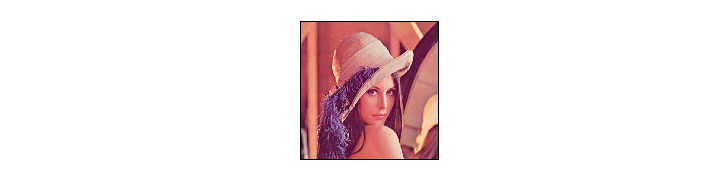

RadioButtons(description=u'bpp', index=2, options=('1bpp', '8bpp', '24bpp'), value='24bpp')

In [15]:
imagemprofundidade('dataset/lenna.png')

### Amostragem e Quantização

* O processo de aquisição de imagem compreende o processo de transformação da luz (contínuo) em imagem digital (discreto)
* Amostragem: Particiona o espaço (resolução da imagem)
* Quantização: Particiona os níveis de luz (Profundidade de Cor)

In [4]:
def desenha_grid(img, grid_n):
    rows_n = np.linspace(0, img.shape[0], grid_n)
    cols_n = np.linspace(0, img.shape[1], grid_n)
    
    for i in rows_n:
        cv2.line(img, (int(i), 0), (int(i), img.shape[1]), (127,0,0), 3)
    for j in cols_n:
        cv2.line(img, (0, int(j)), (img.shape[0], int(j)), (127,0,0), 3)

def mostrar_amostragem(caminho):
    
    fig, axes = plt.subplots(figsize=(5,2), dpi = 100, nrows=1, ncols=3)
    img = cv2.cvtColor(cv2.imread(caminho,1),cv2.COLOR_BGR2RGB)
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    
    def update(args):
        v = args['new']
        axes[0].imshow(img)
        grid = np.copy(img)
        desenha_grid(grid, v+1)
        axes[1].imshow(grid)
        axes[2].imshow(cv2.resize(img,(v,v)))
    
    update({'new':10})
    slider = IntSlider(min=2,max=55,step=5,value=10,description='Tamanho')
    slider.observe(update, names='value')
    display(slider)

<IPython.core.display.Javascript object>


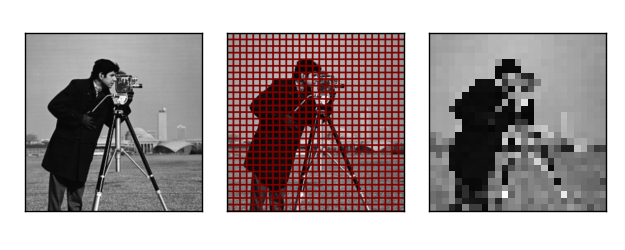

IntSlider(value=10, description='Tamanho', max=55, min=2, step=5)

In [5]:
mostrar_amostragem('dataset/cameraman.tif')